Just a notebook for me to play around and look at possible analysis and visualizations to dive deeper into

Visuallizations for the city data

In [6]:
from os import path
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
DATA_DIR = '/Users/joeskvarna/Desktop/Thesis/Data'
FIG_DIR = '/Users/joeskvarna/Desktop/Thesis/Figures/City/'

# 0. Loading and minor preprocessing of dataset

In [2]:
city_dataset = pd.read_csv(path.join(DATA_DIR, 'city_dataset.csv'))
city_dataset.head()

,city,mayor_name,CO2_per_cap,plus_minus,conservatism,supports_paris,mayor_political_party
0,Columbus,Andrew Ginther,19.8,8.5,-0.26,True,D
1,Baltimore,Bernard Young,20.2,9.1,-0.66,True,D
2,New York,Bill de Blasio,17.1,5.5,-0.66,True,D
3,Buffalo,Byron Brown,19.8,10.0,-0.66,True,D
4,Las Vegas,Carolyn Goodman,12.3,4.8,-0.03,False,I


In [3]:
city_dataset[['supports_paris']] = city_dataset[['supports_paris']].astype(int)
city_dataset[['is_democrat']] = (city_dataset[['mayor_political_party']] == 'D').astype(int)
city_dataset[['conservatism_sq']] = city_dataset[['conservatism']]**2
city_dataset.head()

,city,mayor_name,CO2_per_cap,plus_minus,conservatism,supports_paris,mayor_political_party,is_democrat,conservatism_sq
0,Columbus,Andrew Ginther,19.8,8.5,-0.26,1,D,1,0.0676
1,Baltimore,Bernard Young,20.2,9.1,-0.66,1,D,1,0.4356
2,New York,Bill de Blasio,17.1,5.5,-0.66,1,D,1,0.4356
3,Buffalo,Byron Brown,19.8,10.0,-0.66,1,D,1,0.4356
4,Las Vegas,Carolyn Goodman,12.3,4.8,-0.03,0,I,0,0.0009


In [4]:
city_dataset.describe()

,CO2_per_cap,plus_minus,conservatism,supports_paris,is_democrat,conservatism_sq
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,18.669231,7.348077,-0.322500,0.807692,0.730769,0.190902
std,3.383903,2.463816,0.297657,0.397959,0.447888,0.225921
min,12.300000,3.200000,-0.930000,0.000000,0.000000,0.000000
25%,15.975000,5.100000,-0.520000,1.000000,0.000000,0.028075
50%,18.850000,7.450000,-0.305000,1.000000,1.000000,0.093250
75%,20.875000,9.000000,-0.092500,1.000000,1.000000,0.270400
max,26.100000,13.500000,0.260000,1.000000,1.000000,0.864900


<AxesSubplot:xlabel='conservatism', ylabel='CO2_per_cap'>

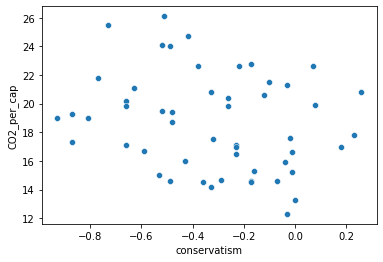

In [8]:
sns.scatterplot(data=city_dataset, x="conservatism", y="CO2_per_cap")

<AxesSubplot:xlabel='mayor_political_party', ylabel='Count'>

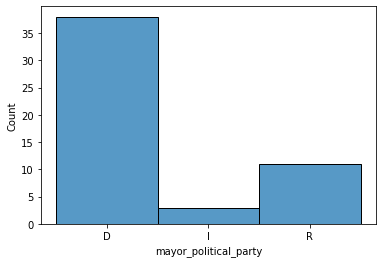

In [9]:
sns.histplot(data=city_dataset, x="mayor_political_party")

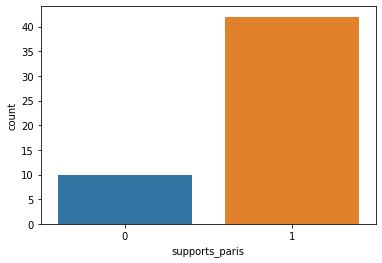

In [10]:
ax = sns.countplot(x="supports_paris", data=city_dataset)

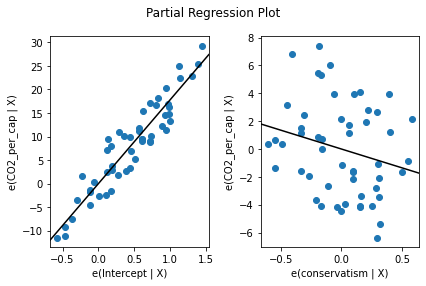

In [8]:
fig = sm.graphics.plot_partregress_grid(results1)
fig.tight_layout(pad = 1)

# 1. CO2 Model

## 1.1 Full linear model

In [5]:
model = smf.ols(formula='CO2_per_cap ~ conservatism + supports_paris + is_democrat', data=city_dataset)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.798
Date:                Thu, 06 Jan 2022   Prob (F-statistic):             0.0500
Time:                        11:44:37   Log-Likelihood:                -132.48
No. Observations:                  52   AIC:                             273.0
Df Residuals:                      48   BIC:                             280.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.7466      1.027     17.

## 1.2 CO2 per cap and conservatism

In [7]:
model1 = smf.ols(formula='CO2_per_cap ~ conservatism', data=city_dataset)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2.998
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0896
Time:                        15:55:28   Log-Likelihood:                -135.16
No. Observations:                  52   AIC:                             274.3
Df Residuals:                      50   BIC:                             278.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.7973      0.682     26.084   

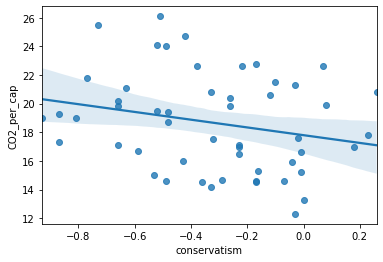

In [7]:
sns.regplot(y = 'CO2_per_cap', x = 'conservatism', data = city_dataset)
plt.savefig(FIG_DIR + 'CO2_conservatism.png')

## 1.3 CO2 per cap and supports paris

In [8]:
model2 = smf.ols(formula='CO2_per_cap ~ supports_paris', data=city_dataset)
results2 = model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.004   
Dependent Variable: CO2_per_cap      AIC:                276.1109
Date:               2022-01-05 15:56 BIC:                280.0134
No. Observations:   52               Log-Likelihood:     -136.06 
Df Model:           1                F-statistic:        1.195   
Df Residuals:       50               Prob (F-statistic): 0.280   
R-squared:          0.023            Scale:              11.407  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         17.6200   1.0680 16.4974 0.0000 15.4748 19.7652
supports_paris     1.2990   1.1884  1.0931 0.2796 -1.0879  3.6860
-----------------------------------------------------------------
Omnibus:              4.611        Durbin-Watson:           1.993
Prob(Omnibus):        0.100

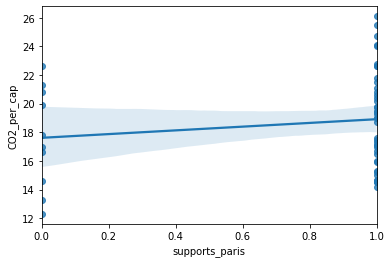

In [8]:
sns.regplot(y = 'CO2_per_cap', x = 'supports_paris', data = city_dataset)
plt.savefig(FIG_DIR + 'CO2_supportparis.png')

## 1.4. CO2 per cap and is_democrat

In [9]:
model3 = smf.ols(formula='CO2_per_cap ~ is_democrat', data=city_dataset)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:            CO2_per_cap   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5.722
Date:                Thu, 06 Jan 2022   Prob (F-statistic):             0.0206
Time:                        11:49:41   Log-Likelihood:                -133.85
No. Observations:                  52   AIC:                             271.7
Df Residuals:                      50   BIC:                             275.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.9000      0.865     19.533      

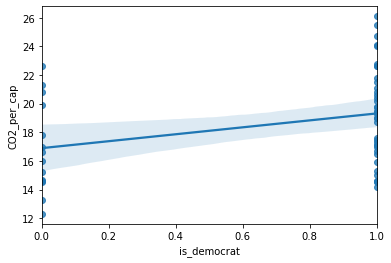

In [10]:
sns.regplot(y = 'CO2_per_cap', x = 'is_democrat', data = city_dataset)
plt.savefig(FIG_DIR + 'CO2_democrat.png')

# 2. Supports Paris Model

## 2.1. Full model

### 2.1a: linear

In [11]:
model7 = smf.ols(formula='supports_paris ~ is_democrat + conservatism', data=city_dataset)
results7 = model7.fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:         supports_paris   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     53.79
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           4.35e-13
Time:                        15:09:52   Log-Likelihood:                 4.8391
No. Observations:                  52   AIC:                            -3.678
Df Residuals:                      49   BIC:                             2.175
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2758      0.061      4.534   

### 2.1b: Logistic

## 2.2. Supports Paris and conservatism

### 2.2a: linear

In [10]:
model5 = smf.ols(formula='supports_paris ~ conservatism', data=city_dataset)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         supports_paris   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     35.88
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           2.27e-07
Time:                        15:04:38   Log-Likelihood:                -11.301
No. Observations:                  52   AIC:                             26.60
Df Residuals:                      50   BIC:                             30.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5290      0.063      8.392      0.000       0.402       0.656
conservatism    -0.8642      0.144     -5.990      0.000      -1.154      -0.574
==============================================================================
Omnibus:                        5.929   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                3.415
Skew:                          -0.424   Prob(JB):                        0.181
Kurtosis:                       2.075   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='conservatism', ylabel='supports_paris'>

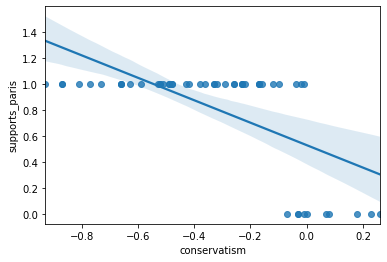

In [18]:
sns.regplot(y = 'supports_paris', x = 'conservatism', data = city_dataset)

### 2.2b: logistic

In [12]:
#model

# defining the dependent and independent variables
X = city_dataset[['conservatism']]
y = city_dataset[['supports_paris']]
  
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.144526
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         supports_paris   No. Observations:                   52
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                            0
Date:                Thu, 06 Jan 2022   Pseudo R-squ.:                  0.7048
Time:                        11:53:00   Log-Likelihood:                -7.5153
converged:                       True   LL-Null:                       -25.457
Covariance Type:            nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
conservatism   -21.5463      9.204     -2.341      0.019     -39.586      -3.506

Possibly complete qua

/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


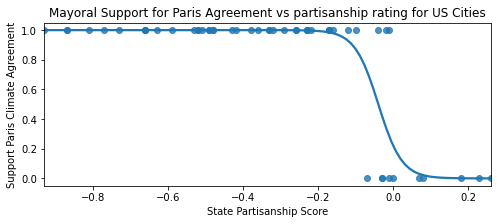

In [13]:
#plot
plt.figure(figsize = (8,3))
sns.regplot(y = y, x = X, data = city_dataset, logistic = True)
plt.title('Mayoral Support for Paris Agreement vs partisanship rating for US Cities')
plt.ylabel('Support Paris Climate Agreement')
plt.xlabel('State Partisanship Score')
plt.savefig(FIG_DIR + 'Paris_conservatism.png')

## 2.3 Supports Paris and is democrat

### 2.3a: Linear

In [5]:
model6 = smf.ols(formula='supports_paris ~ is_democrat', data=city_dataset)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:         supports_paris   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     91.35
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           7.21e-13
Time:                        16:41:43   Log-Likelihood:                 1.6522
No. Observations:                  52   AIC:                            0.6957
Df Residuals:                      50   BIC:                             4.598
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2857      0.064      4.472      

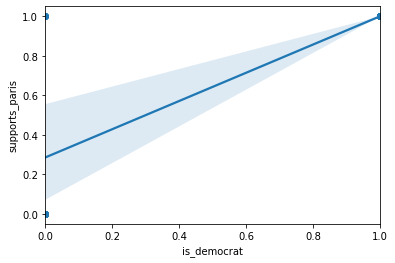

In [14]:
sns.regplot(y = 'supports_paris', x = 'is_democrat', data = city_dataset)
plt.savefig(FIG_DIR + 'Paris_democrat.png')

In [20]:
#print(results6.params)

def supports_paris(party):
    """
    predicts percent chance a city supports paris based on whether their mayor is a democrat
    enter 1 for democrat, 0 for not a democrat
    """
    b0, b1 = results6.params
    return (b0 + b1*party)

democrat = supports_paris(1)
not_dem = supports_paris(0)

print(f'There is a {democrat*100} percent chance a democrat supports paris')
print(f'There is a {not_dem*100} percent chance a non-democrat supports paris')

There is a 99.99999999999997 percent chance a democrat supports paris
There is a 28.571428571428626 percent chance a non-democrat supports paris


### 2.3b: logistic

In [8]:
city_dataset.head()

,city,mayor_name,CO2_per_cap,plus_minus,conservatism,supports_paris,mayor_political_party,is_democrat,conservatism_sq
0,Columbus,Andrew Ginther,19.8,8.5,-0.26,1,D,1,0.0676
1,Baltimore,Bernard Young,20.2,9.1,-0.66,1,D,1,0.4356
2,New York,Bill de Blasio,17.1,5.5,-0.66,1,D,1,0.4356
3,Buffalo,Byron Brown,19.8,10.0,-0.66,1,D,1,0.4356
4,Las Vegas,Carolyn Goodman,12.3,4.8,-0.03,0,I,0,0.0009


In [12]:
#model

# defining the dependent and independent variables
X = city_dataset[['is_democrat']]
y = city_dataset[['supports_paris']]
  
# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.186617
         Iterations 23


LinAlgError: Singular matrix

<AxesSubplot:xlabel='is_democrat', ylabel='supports_paris'>

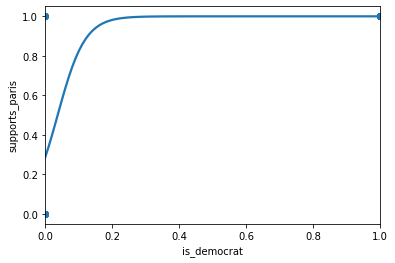

In [10]:
sns.regplot(y = 'supports_paris', x = 'is_democrat', data = city_dataset, logistic = True)

# 3. Viz and misc

<AxesSubplot:xlabel='is_democrat', ylabel='supports_paris'>

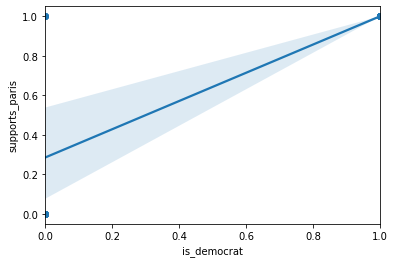

In [22]:
sns.regplot(data = city_dataset, x = 'is_democrat', y = 'supports_paris')

<AxesSubplot:xlabel='is_democrat', ylabel='supports_paris'>

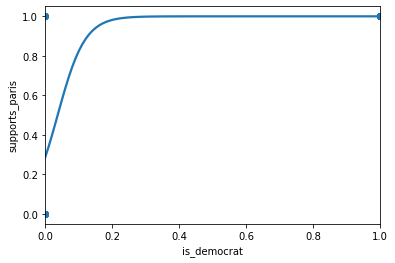

In [23]:
sns.regplot(data = city_dataset, x = 'is_democrat', y = 'supports_paris', logistic = True)

<AxesSubplot:xlabel='conservatism', ylabel='supports_paris'>

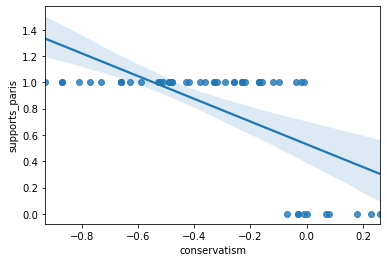

In [29]:
sns.regplot(data = city_dataset, x = 'conservatism', y = 'supports_paris')

<AxesSubplot:xlabel='conservatism', ylabel='supports_paris'>

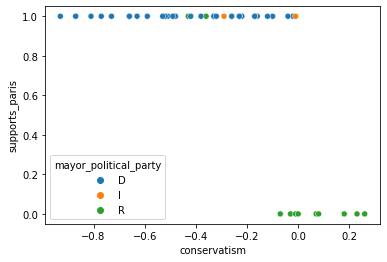

In [31]:
sns.scatterplot(data = city_dataset, x = 'conservatism', y = 'supports_paris', hue = 'mayor_political_party')

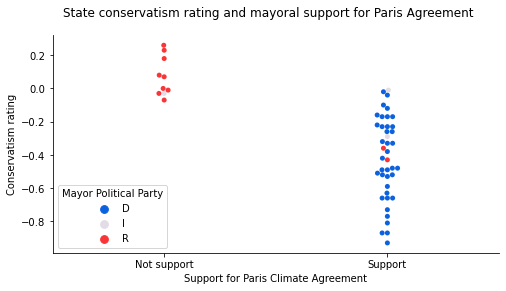

In [18]:
plt.figure(figsize = (8,4))
colors = ["#0C61DF",'#e3dce6', "#FA3535"]
sns.set_palette(sns.color_palette(colors))
sns.swarmplot(data = city_dataset, y = 'conservatism', x = 'supports_paris', hue = 'mayor_political_party')
plt.suptitle('State conservatism rating and mayoral support for Paris Agreement')
plt.xticks([0, 1], ['Not support', 'Support'])
plt.xlabel('Support for Paris Climate Agreement')
plt.ylabel('Conservatism rating')
plt.legend(title = 'Mayor Political Party')
sns.despine()
plt.savefig(FIG_DIR + 'swarmplot.png')

/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/joeskvarna/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


<AxesSubplot:xlabel='conservatism', ylabel='supports_paris'>

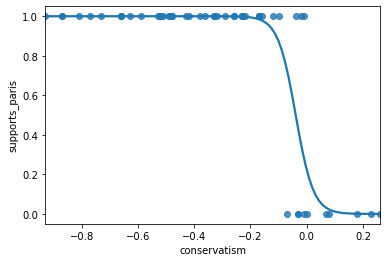

In [25]:
sns.regplot(data = city_dataset, x = 'conservatism', y = 'supports_paris', logistic = True)

In [26]:
#conservatism squared (lower R squared, probably don't use)
model8 = smf.ols(formula='supports_paris ~ is_democrat + conservatism_sq', data=city_dataset)
results8 = model8.fit()
print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:         supports_paris   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     45.39
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           7.03e-12
Time:                        15:14:07   Log-Likelihood:                 1.8865
No. Observations:                  52   AIC:                             2.227
Df Residuals:                      49   BIC:                             8.081
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2813      0.065     